In [1]:
import os
import pandas as pd
import numpy as np
import plotnine as p9

In [2]:
# list output files
file_paths = os.listdir(os.path.join('data', 'results'))
# keep only .csv files
results = [pd.read_csv(os.path.join('data', 'results', p)) for p in file_paths if p.endswith('.csv')]

In [3]:
results = pd.concat(results)

In [4]:
results['mean_auc'] = results.groupby(['reduction_name', 'dataset', 'score_key'])['auroc'].transform('mean')
results['mean_f1'] = results.groupby(['reduction_name', 'dataset', 'score_key'])['f1_score'].transform('mean')

In [5]:
results

,reduction_name,score_key,state,fold,auroc,tpr,fpr,f1_score,oob_score,train_split,test_split,test_classes,dataset,mean_auc,mean_f1
0,mofa,lr_means,0,0,0.944444,[0. 0.33333333 0.66666667 1. 1...,[0. 0. 0. 0.33333333 1...,0.828571,0.300000,[ 1 2 3 4 7 8 9 10 11 15],[ 0 5 6 12 13 14],[0 0 0 1 1 1],carraro,0.672870,0.620291
1,tensor,lr_means,0,0,1.000000,[0. 0.33333333 1. 1. ],[0. 0. 0. 1.],0.828571,0.600000,[ 1 2 3 4 7 8 9 10 11 15],[ 0 5 6 12 13 14],[0 0 0 1 1 1],carraro,0.904630,0.642540
2,mofa,expr_prod,0,0,0.888889,[0. 0.66666667 0.66666667 1. 1...,[0. 0. 0.33333333 0.33333333 1...,0.828571,0.400000,[ 1 2 3 4 7 8 9 10 11 15],[ 0 5 6 12 13 14],[0 0 0 1 1 1],carraro,0.703426,0.596984
3,tensor,expr_prod,0,0,0.666667,[0. 0. 1. 1.],[0. 0.33333333 0.33333333 1. ],0.828571,0.300000,[ 1 2 3 4 7 8 9 10 11 15],[ 0 5 6 12 13 14],[0 0 0 1 1 1],carraro,0.629167,0.550265
4,mofa,lr_logfc,0,0,0.777778,[0. 0.33333333 0.66666667 0.66666667 1...,[0. 0. 0. 0.66666667 0...,0.828571,0.600000,[ 1 2 3 4 7 8 9 10 11 15],[ 0 5 6 12 13 14],[0 0 0 1 1 1],carraro,0.752407,0.543492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,tensor,lrscore,4,2,0.771429,[0. 0. 0.6 0.6 0.8 0.8 1. 1. ],[0. 0.14285714 0.14285714 0.28571429 0...,0.530812,0.346154,[ 0 2 3 5 6 7 8 9 11 15 16 18 20 21 22 ...,[ 1 4 10 12 13 14 17 19 28 30 31 32],[1 0 0 0 1 0 1 0 0 0 1 1],velmeshev,0.586164,0.506793
176,mofa,lr_probs,4,2,0.400000,[0. 0.2 0.2 0.4 0.4 0.4 0.8 1. 1. ],[0. 0. 0.42857143 0.42857143 0...,0.500000,0.538462,[ 0 2 3 5 6 7 8 9 11 15 16 18 20 21 22 ...,[ 1 4 10 12 13 14 17 19 28 30 31 32],[1 0 0 0 1 0 1 0 0 0 1 1],velmeshev,0.628810,0.571520
177,tensor,lr_probs,4,2,0.657143,[0. 0. 0.2 0.2 0.8 0.8 1. 1. ],[0. 0.14285714 0.14285714 0.28571429 0...,0.471429,0.615385,[ 0 2 3 5 6 7 8 9 11 15 16 18 20 21 22 ...,[ 1 4 10 12 13 14 17 19 28 30 31 32],[1 0 0 0 1 0 1 0 0 0 1 1],velmeshev,0.638704,0.585348
178,mofa,magnitude_rank,4,2,1.000000,[0. 0.2 1. 1. 1. 1. ],[0. 0. 0. 0.14285714 0...,1.000000,0.576923,[ 0 2 3 5 6 7 8 9 11 15 16 18 20 21 22 ...,[ 1 4 10 12 13 14 17 19 28 30 31 32],[1 0 0 0 1 0 1 0 0 0 1 1],velmeshev,0.816442,0.742163


In [6]:
results['score_key'].unique()

remap_dict = {'lr_means':'CellPhoneDB',
              'expr_prod':'Product',
              'lr_logfc': 'logFC',
              'lrscore': 'SingleCellSignalR',
              'lr_probs': 'CellChat',
              'magnitude_rank':'Consensus'}
results['score_key'] = results['score_key'].map(remap_dict)

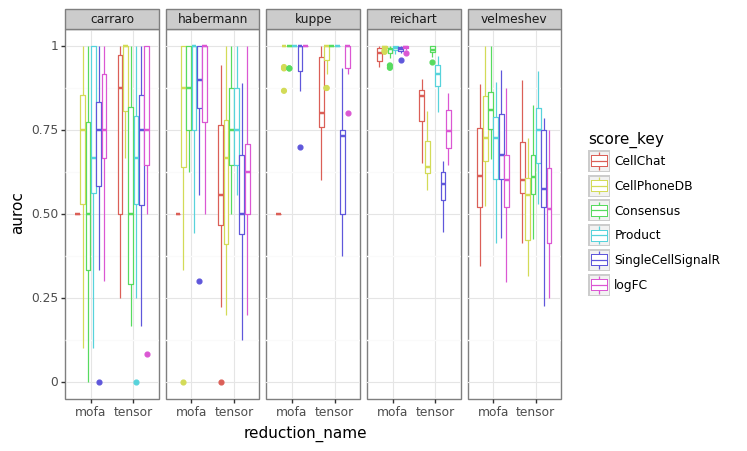

<ggplot: (8730080083836)>

In [7]:
## plot results as boxplots by reduction_name & score_key
p9.ggplot(results, p9.aes(x='reduction_name', y='auroc', color='score_key')) + \
    p9.geom_boxplot() + \
    p9.theme_bw() + p9.facet_grid(' ~ dataset')

In [8]:
metric = 'mean_auc'

In [9]:
results = results[['reduction_name', 'score_key', 'mean_auc', 'mean_f1', 'dataset']].drop_duplicates()

In [10]:
results['rank'] = results.groupby(['dataset', 'reduction_name'])[metric].rank(ascending=False, method='average').astype('int')

In [11]:
results.head()

,reduction_name,score_key,mean_auc,mean_f1,dataset,rank
0,mofa,CellPhoneDB,0.672870,0.620291,carraro,4
1,tensor,CellPhoneDB,0.904630,0.642540,carraro,1
2,mofa,Product,0.703426,0.596984,carraro,2
3,tensor,Product,0.629167,0.550265,carraro,5
4,mofa,logFC,0.752407,0.543492,carraro,1


In [12]:
# mean rank per score
score_avg = results.groupby(['score_key', 'reduction_name'])[['rank', 'mean_auc', 'mean_f1']].mean()

In [13]:
score_avg

rank  mean_auc   mean_f1
score_key         reduction_name                          
CellChat          mofa             5.8  0.620945  0.443462
                  tensor           3.6  0.720448  0.653086
CellPhoneDB       mofa             3.2  0.833350  0.778263
                  tensor           3.6  0.735326  0.614909
Consensus         mofa             3.6  0.837470  0.712348
                  tensor           2.6  0.783739  0.734833
Product           mofa             2.2  0.850617  0.748368
                  tensor           2.0  0.807544  0.706877
SingleCellSignalR mofa             3.8  0.833188  0.738190
                  tensor           5.2  0.611810  0.562380
logFC             mofa             2.2  0.846573  0.768447
                  tensor           3.8  0.716946  0.617341

In [14]:
score_avg['dataset'] = "Score Average"

In [15]:
## bind to results
results = pd.concat([results, score_avg.reset_index()])

In [16]:
# if dataset != 'Score Average', then None
results['rank'] = results['rank'].where(results['dataset'] == 'Score Average', None)

/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_text : Removed 60 rows containing missing values.


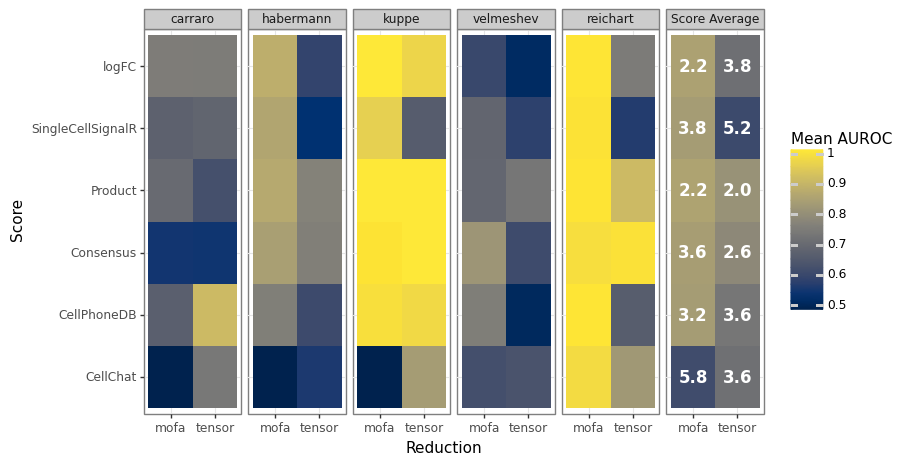

<ggplot: (8730077518512)>

In [17]:
## mosaic plot
# order alphabetically
results['dataset'] = pd.Categorical(results['dataset'], categories=['carraro', 'habermann', 'kuppe', 'velmeshev', 'reichart', 'Score Average'])
p9.ggplot(results, p9.aes(x='reduction_name', y='score_key', fill='mean_auc')) + \
    p9.geom_tile() + \
    p9.theme_bw() + p9.facet_grid(' ~ dataset') + \
    p9.scale_fill_cmap(limits=(0.5, 1), cmap_name='cividis') + \
    p9.geom_text(p9.aes(label='rank'), size=12, color='white', fontweight='bold') + \
    p9.theme(figure_size=(8, 5)) + \
    p9.labs(x='Reduction', y='Score', fill='Mean AUROC')

In [20]:
dimred_results = results.groupby(['reduction_name', 'score_key']).mean().reset_index()

/tmp/ipykernel_47974/2054308315.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


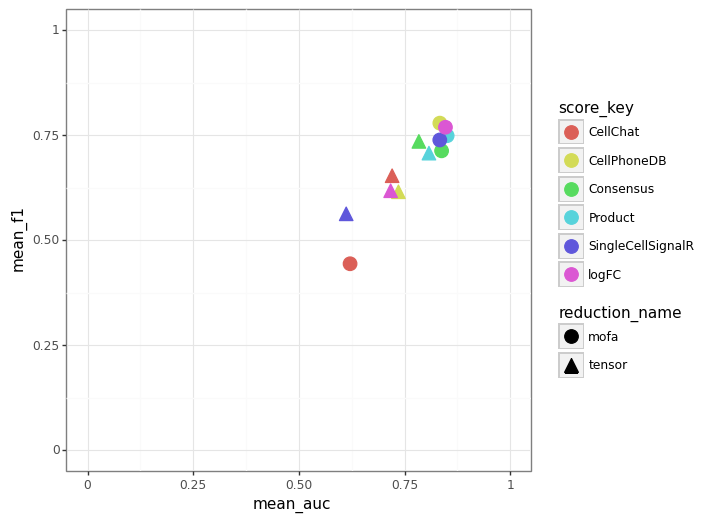

<ggplot: (8730077307709)>

In [21]:
## scatter plot by reduction_name
p9.ggplot(dimred_results, p9.aes(x='mean_auc', y='mean_f1', color='score_key', shape='reduction_name')) + \
    p9.geom_point(size=5) + \
        p9.theme_bw() + \
        p9.scale_x_continuous(limits=(0, 1)) + \
        p9.scale_y_continuous(limits=(0, 1)) + \
        p9.theme(figure_size=(6, 6))

Reichart Model - Does not look like something I want to include

In [22]:
import numpy as np
import pandas as pd

import scanpy as sc

import plotnine as p9

import liana as li

# load muon and mofax
import muon as mu
import mofax as mofa

import decoupler as dc

/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [23]:
adata = sc.read_h5ad(os.path.join('data', 'results', 'reichart_dimred.h5ad'), backed='r')

In [24]:
meta_features = ['Sample','Region_x', 'Primary.Genetic.Diagnosis', 'tissue', 'sex', 'assay', 'development_stage', 'disease']

In [25]:
model = mofa.mofa_model(os.path.join("data", "results", "models", "reichart", "expr_prod.hdf5"))
metadata = adata.obs[meta_features].drop_duplicates().rename(columns={'Sample':'sample', 'disease':'condition'})
model.metadata = model.metadata.merge(metadata, on='sample')

In [26]:
metadata.groupby(["condition",'Primary.Genetic.Diagnosis']).count()

sample  Region_x  tissue  \
condition              Primary.Genetic.Diagnosis                             
dilated cardiomyopathy DES                             5         5       5   
                       DSP                             1         1       1   
                       FLNC                            1         1       1   
                       LMNA                           14        14      14   
                       PLN                             2         2       2   
                       PVneg                           8         8       8   
                       RBM20                          10        10      10   
                       TNNC1                           4         4       4   
                       TNNT2                           2         2       2   
                       TTN                            16        16      16   
                       control                         0         0       0   
normal                 DES                             0         0       0   
                       DSP                             0         0       0   
                       FLNC                            0         0       0   
                       LMNA                            0         0       0   
                       PLN                             0         0       0   
                       PVneg                           0         0       0   
                       RBM20                           0         0       0   
                       TNNC1                           0         0       0   
                       TNNT2                           0         0       0   
                       TTN                             0         0       0   
                       control                        63        63      63   

                                                  sex  assay  \
condition              Primary.Genetic.Diagnosis               
dilated cardiomyopathy DES                          5      5   
                       DSP                          1      1   
                       FLNC                         1      1   
                       LMNA                        14     14   
                       PLN                          2      2   
                       PVneg                        8      8   
                       RBM20                       10     10   
                       TNNC1                        4      4   
                       TNNT2                        2      2   
                       TTN                         16     16   
                       control                      0      0   
normal                 DES                          0      0   
                       DSP                          0      0   
                       FLNC                         0      0   
                       LMNA                         0      0   
                       PLN                          0      0   
                       PVneg                        0      0   
                       RBM20                        0      0   
                       TNNC1                        0      0   
                       TNNT2                        0      0   
                       TTN                          0      0   
                       control                     63     63   

                                                  development_stage  
condition              Primary.Genetic.Diagnosis                     
dilated cardiomyopathy DES                                        5  
                       DSP                                        1  
                       FLNC                                       1  
                       LMNA                                      14  
                       PLN                                        2  
                       PVneg                                      8  
                       RBM20                                     10  
          

In [27]:
model.get_weights().shape

(12014, 20)

TODO save mdata

In [28]:
mdata = li.multi.lrs_to_views(adata,
                              sample_key="Sample",
                              score_key="expr_prod",
                              inverse_fun=lambda x: -np.log2(x),
                              lr_prop = 0.33, # minimum required proportion of samples to keep an LR
                              lrs_per_sample = 5, # minimum number of interactions to keep a sample in a specific view
                              lrs_per_view = 15, # minimum number of interactions to keep a view
                              samples_per_view = 5, # minimum number of samples to keep a view
                              min_variance = 0, # minimum variance to keep an interaction
                              lr_fill = 0, # fill missing LR values across samples with this
                              verbose=True
                              )


100%|██████████| 96/96 [00:08<00:00, 10.86it/s]


In [29]:
mdata.varm["LFs"] = model.get_weights()
mdata.obsm["X_mofa"] = model.get_factors()

In [30]:
mdata.obs = model.metadata.set_index('sample')

Check Factors

In [40]:
factor_scores = li.multi.get_factor_scores(mdata, obsm_key='X_mofa')
factor_scores.head()

,sample,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,...,Factor20,group,disease,Region_x,Primary.Genetic.Diagnosis,tissue,sex,assay,development_stage,condition
0,BO_H01_RV0_premrna,-0.403704,-0.771480,-0.208185,-0.121225,-0.595375,-0.007114,0.264564,-0.035660,0.019224,...,-0.056914,group1,dilated cardiomyopathy,RV,PVneg,heart right ventricle,male,10x 3' v3,sixth decade human stage,dilated cardiomyopathy
1,BO_H01_S00_premrna,-0.494822,-0.623704,-0.044436,0.425835,-0.684017,0.000780,0.212482,-0.061610,-0.046826,...,-0.063799,group1,dilated cardiomyopathy,LV,PVneg,interventricular septum,male,10x 3' v3,sixth decade human stage,dilated cardiomyopathy
2,BO_H02_LV0_premrna,-0.364146,0.311142,0.114495,0.101174,-0.328655,0.072768,0.627027,-0.041359,-0.021418,...,0.012598,group1,dilated cardiomyopathy,LV,PVneg,heart left ventricle,male,10x 3' v3,sixth decade human stage,dilated cardiomyopathy
3,BO_H02_RV0_premrna,-0.376053,0.484797,-0.023409,0.739684,0.238800,0.108472,0.348735,-0.035248,-0.008090,...,0.003369,group1,dilated cardiomyopathy,RV,PVneg,heart right ventricle,male,10x 3' v3,sixth decade human stage,dilated cardiomyopathy
4,BO_H02_S00_premrna,-0.218007,0.305596,0.099863,0.302806,-0.470391,0.043527,0.439261,-0.075630,-0.055188,...,0.000966,group1,dilated cardiomyopathy,LV,PVneg,interventricular septum,male,10x 3' v3,sixth decade human stage,dilated cardiomyopathy


In [41]:
factor_scores

,sample,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,...,Factor20,group,disease,Region_x,Primary.Genetic.Diagnosis,tissue,sex,assay,development_stage,condition
0,BO_H01_RV0_premrna,-0.403704,-0.771480,-0.208185,-0.121225,-0.595375,-0.007114,0.264564,-0.035660,0.019224,...,-0.056914,group1,dilated cardiomyopathy,RV,PVneg,heart right ventricle,male,10x 3' v3,sixth decade human stage,dilated cardiomyopathy
1,BO_H01_S00_premrna,-0.494822,-0.623704,-0.044436,0.425835,-0.684017,0.000780,0.212482,-0.061610,-0.046826,...,-0.063799,group1,dilated cardiomyopathy,LV,PVneg,interventricular septum,male,10x 3' v3,sixth decade human stage,dilated cardiomyopathy
2,BO_H02_LV0_premrna,-0.364146,0.311142,0.114495,0.101174,-0.328655,0.072768,0.627027,-0.041359,-0.021418,...,0.012598,group1,dilated cardiomyopathy,LV,PVneg,heart left ventricle,male,10x 3' v3,sixth decade human stage,dilated cardiomyopathy
3,BO_H02_RV0_premrna,-0.376053,0.484797,-0.023409,0.739684,0.238800,0.108472,0.348735,-0.035248,-0.008090,...,0.003369,group1,dilated cardiomyopathy,RV,PVneg,heart right ventricle,male,10x 3' v3,sixth decade human stage,dilated cardiomyopathy
4,BO_H02_S00_premrna,-0.218007,0.305596,0.099863,0.302806,-0.470391,0.043527,0.439261,-0.075630,-0.055188,...,0.000966,group1,dilated cardiomyopathy,LV,PVneg,interventricular septum,male,10x 3' v3,sixth decade human stage,dilated cardiomyopathy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,HCAHeart7888922_premrna,1.828476,-0.063447,-0.127656,0.422575,0.353817,-0.016472,0.411647,-0.051325,-0.025631,...,-0.007022,group1,normal,LV,control,heart left ventricle,male,10x 3' v2,seventh decade human stage,normal
122,HCAHeart7888925_premrna,1.802654,-0.207941,-0.129418,0.400121,0.091415,0.039232,0.378703,-0.036065,0.018240,...,-0.003992,group1,normal,LV,control,heart left ventricle,male,10x 3' v2,seventh decade human stage,normal
123,HCAHeart7888926_premrna,1.432203,-0.224717,2.812149,-0.613114,0.297418,-0.106374,0.070668,0.084904,-0.036816,...,0.046623,group1,normal,LV,control,heart left ventricle,male,10x 3' v2,eighth decade human stage,normal
124,HCAHeart7888924_premrna,1.631439,-0.126452,-0.391182,0.042476,0.441186,-0.006849,0.421078,-0.043478,-0.076901,...,-0.007819,group1,normal,LV,control,heart left ventricle,male,10x 3' v2,seventh decade human stage,normal


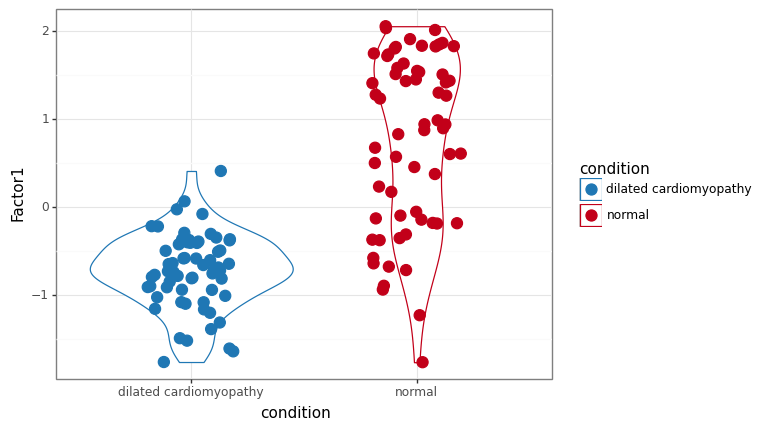

<ggplot: (8729485707877)>

In [42]:
# scatterplot
(p9.ggplot(factor_scores) +
 p9.aes(x='condition', colour='condition', y='Factor1') +
 p9.geom_violin() +
 p9.geom_jitter(size=4, width=0.2) +
 p9.theme_bw() +
 p9.scale_colour_manual(values=['#1f77b4', '#c20019'])
 )



UMAP

In [43]:
sc.pp.neighbors(mdata, use_rep="X_mofa")
sc.tl.umap(mdata)

In [44]:
sc.tl.umap(mdata, min_dist=.2, spread=1., random_state=10)

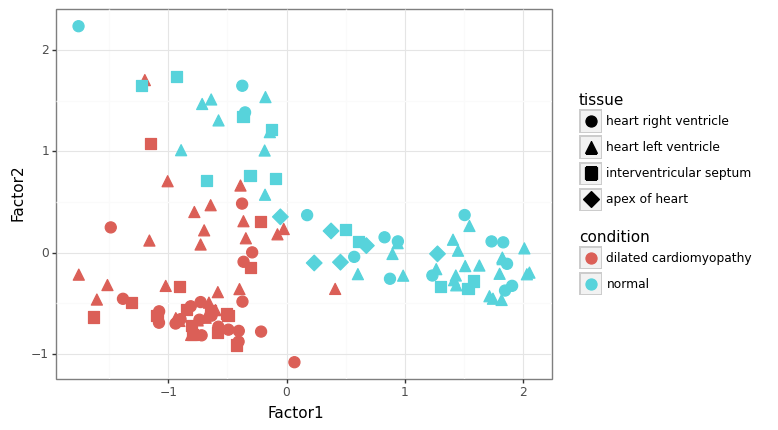

<ggplot: (8729499385073)>

In [70]:
# scatter plot between Factor 1 and Factor 2
(p9.ggplot(factor_scores) +
 p9.aes(x='Factor1', y='Factor2', colour='condition', shape='tissue') +
 p9.geom_point(size=4) +
 p9.theme_bw()
 )

<AxesSubplot:>

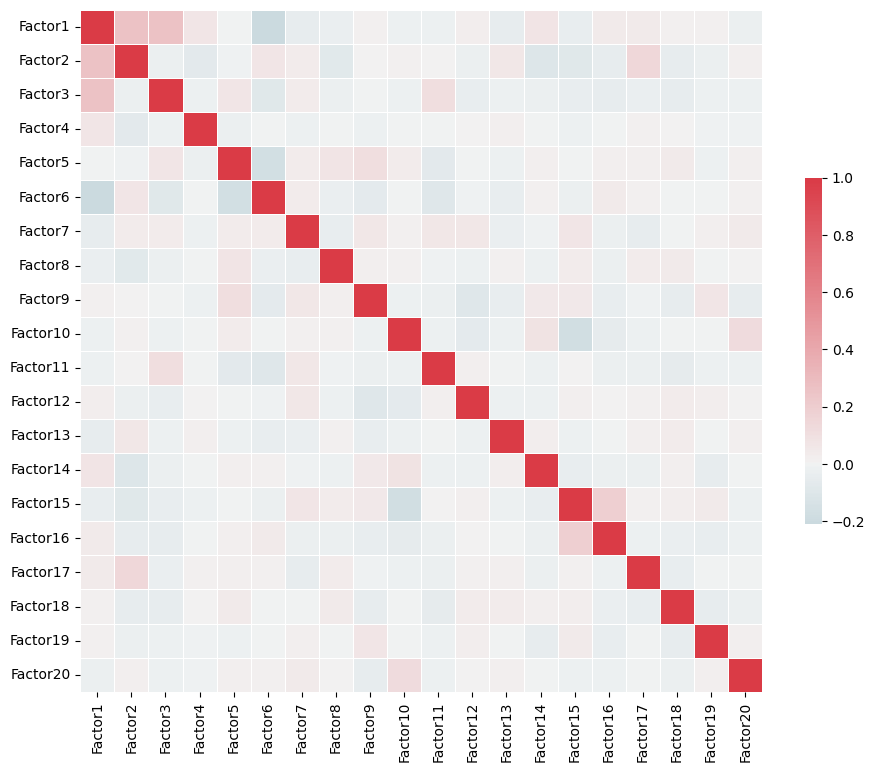

In [60]:
mofa.plot_weights_correlation(model)

<AxesSubplot:>

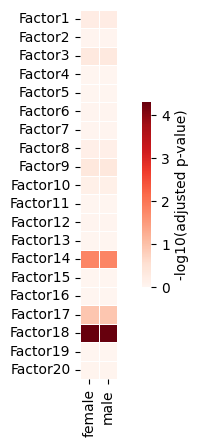

In [64]:
mofa.plot_factors_covariates_correlation(model, covariates=pd.get_dummies(model.metadata['sex']), pvalues=True)

<AxesSubplot:>

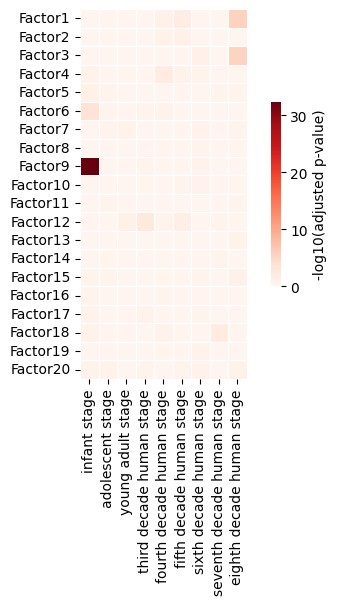

In [65]:
mofa.plot_factors_covariates_correlation(model, covariates=pd.get_dummies(model.metadata['development_stage']), pvalues=True)

<AxesSubplot:>

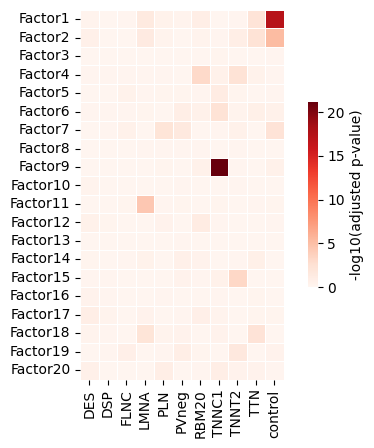

In [68]:
mofa.plot_factors_covariates_correlation(model, covariates=pd.get_dummies(model.metadata['Primary.Genetic.Diagnosis']), pvalues=True)

In [94]:
# get variance explained by view and factor
rsq = model.get_r2()
rsq["R2"] = rsq["R2"] / 100

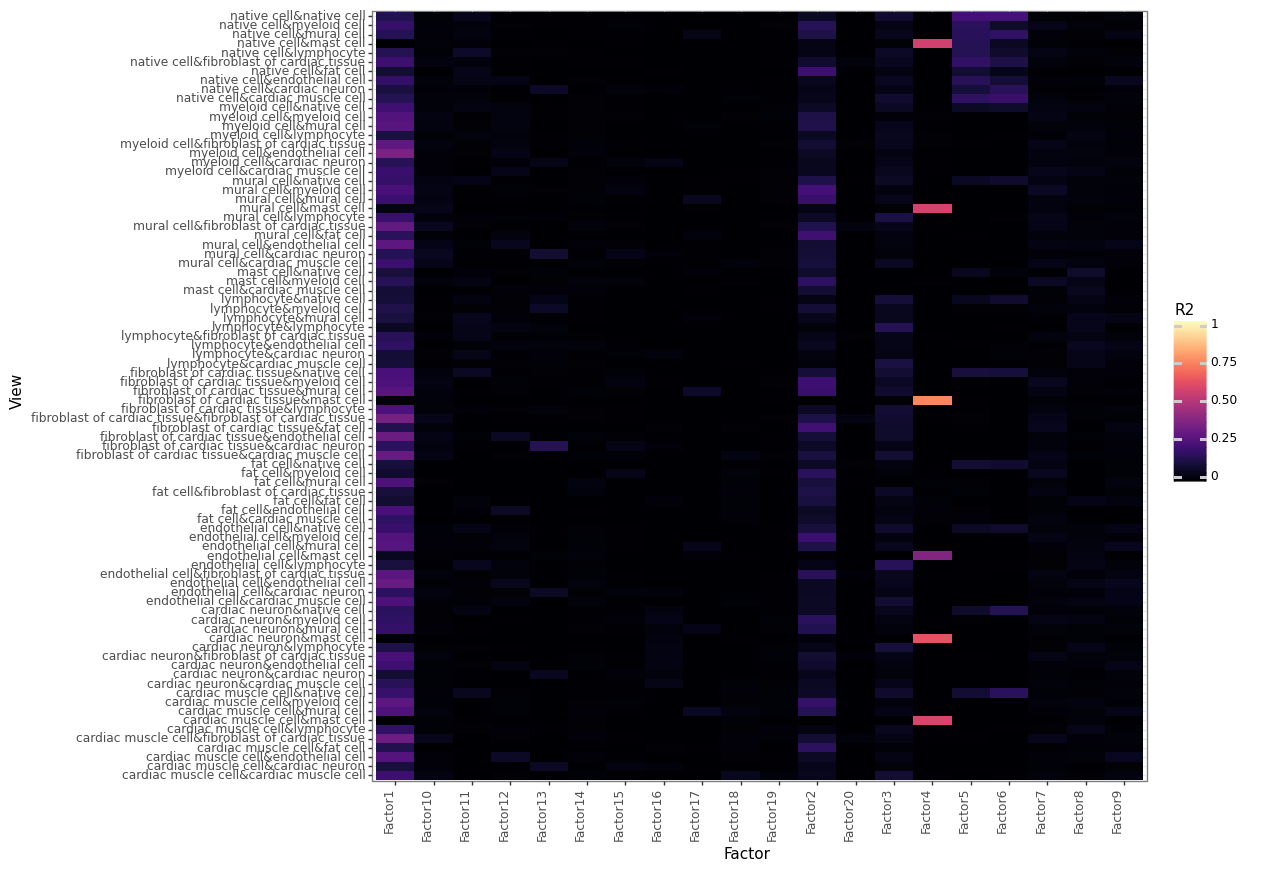

<ggplot: (8729497760985)>

In [96]:
## tile plot
(p9.ggplot(rsq, p9.aes(x='Factor', y='View', fill='R2')) + 
    p9.geom_tile() + 
    p9.theme_bw() + 
    p9.theme(figure_size=(10, 10)) +
    p9.labs(x='Factor', y='View', fill='R2') +
    p9.theme(axis_text_x=p9.element_text(angle=90, hjust=1)) + 
    # change colour
    p9.scale_fill_cmap(limits=(0, 1), cmap_name='magma')
    
)

In [98]:
# Factor 1
factor1_rsq = rsq[rsq['Factor']=='Factor1']
# separate view column
factor1_rsq[['source', 'target']] = factor1_rsq['View'].str.split('&', 1, expand=True)

/tmp/ipykernel_47974/2052994891.py:4: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
/tmp/ipykernel_47974/2052994891.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_47974/2052994891.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


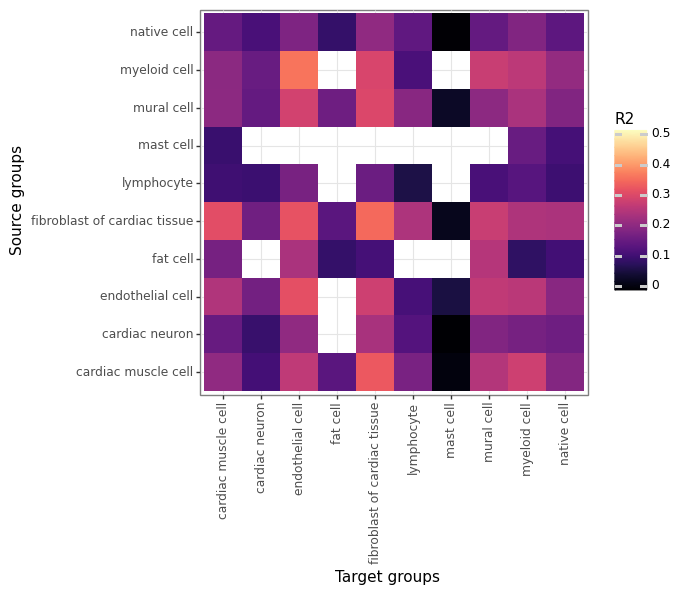

<ggplot: (8729497032272)>

In [113]:
(p9.ggplot(factor1_rsq.reset_index()) +
 p9.aes(x='target', y='source') +
 p9.geom_tile(p9.aes(fill='R2')) +
 p9.scale_fill_cmap(limits=(0, 0.5), cmap_name='magma') +
 p9.theme_bw() +
    p9.theme(figure_size=(5, 5)) +
    p9.labs(x='Target groups', y='Source groups', fill='R2') +
    p9.theme(axis_text_x=p9.element_text(rotation=90, hjust=0.5))
 )



In [103]:
variable_loadings =  li.multi.get_variable_loadings(mdata,
                                                    view_separator=':',
                                                    pair_separator="&",
                                                    variable_separator="^") # get loadings for factor 1
variable_loadings.head()



,ligand_complex,receptor_complex,source,target,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,...,Factor11,Factor12,Factor13,Factor14,Factor15,Factor16,Factor17,Factor18,Factor19,Factor20
3903,PDGFC,FLT1,myeloid cell,endothelial cell,-0.755764,-0.376357,0.023214,0.007787,-0.005181,0.011583,...,-0.207890,0.004211,-0.005225,-0.174150,0.057212,0.004721,0.004228,-0.003318,0.054933,-0.012314
6939,SORBS1,INSR,cardiac muscle cell,myeloid cell,-0.696254,-0.775751,0.006623,0.014090,0.000765,0.004009,...,0.015154,0.076212,-0.003049,0.081351,0.050326,-0.002101,0.067598,0.105985,-0.157755,-0.000223
7339,DCN,EGFR,fibroblast of cardiac tissue,endothelial cell,-0.690013,-0.782135,-0.184568,0.011912,-0.026085,-0.000602,...,0.299776,0.103657,0.000935,0.015846,-0.127836,0.081859,-0.000333,-0.008608,-0.133137,0.001287
5098,DCN,EGFR,fibroblast of cardiac tissue,mural cell,-0.621991,-0.577741,-0.171219,0.009480,-0.037108,0.002901,...,0.429799,0.377556,0.004258,0.063858,-0.152868,0.025454,0.032783,0.256528,-0.194697,0.008663
10315,SORBS1,INSR,cardiac neuron,myeloid cell,-0.577670,-0.554090,0.002361,0.023747,0.000688,0.010092,...,0.020056,0.196079,0.000073,0.472470,0.108485,0.327722,0.051656,0.014678,-0.170140,0.004752


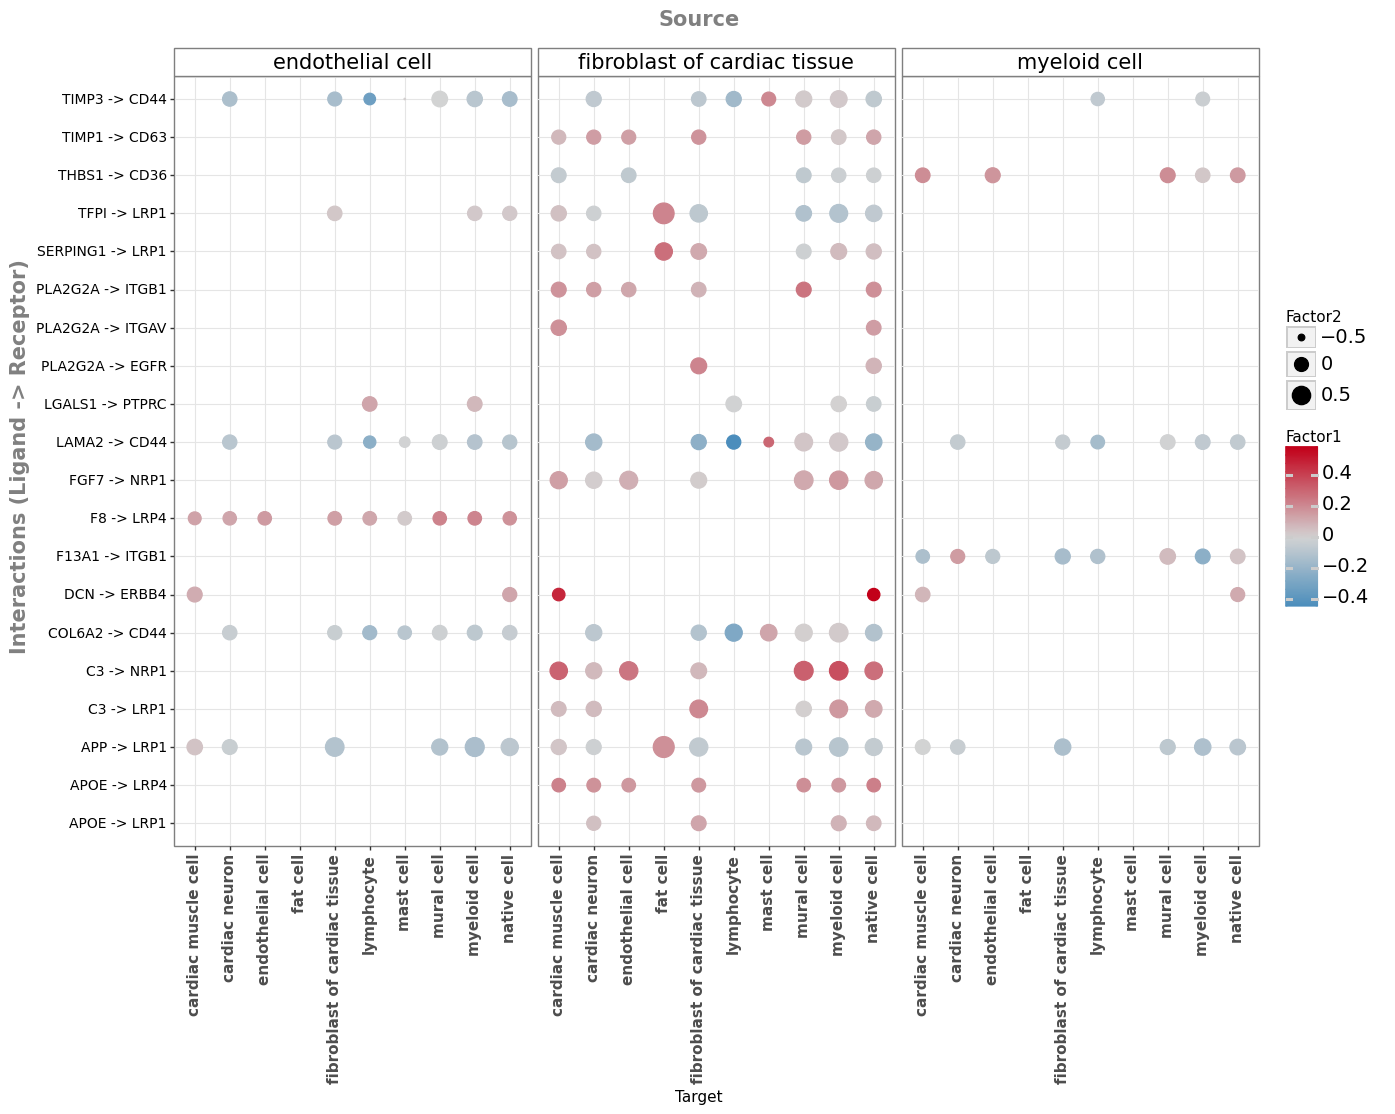

<ggplot: (8729497262171)>

In [120]:
variable_loadings['size'] = 4.5

my_plot = li.pl.dotplot(liana_res = variable_loadings,
                        size='Factor2',
                        colour='Factor1',
                        orderby='Factor1',
                        top_n=20,
                        source_labels=['myeloid cell', 'fibroblast of cardiac tissue', 'endothelial cell'],
                        orderby_ascending=False,
                        size_range=(0.1, 8),
                        figure_size=(14, 10)
                        )
# change colour, with mid as white
my_plot + p9.scale_color_gradient2(low='#1f77b4', mid='lightgray', high='#c20019')

